In [2]:
#Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for graphs
sns.set_style('whitegrid')

#Load the training dataset (CSV)
train_data = pd.read_csv('../data/fraudTrain.csv')

#Load the testing dataset (CSV)
test_data = pd.read_csv('../data/fraudTest.csv')
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
#Check data information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

**Basic Cleaning**

Drop the Unnamed: 0 column (it's just a duplicate index which is not useful for modeling).

In [4]:
#Drop the 'Unnamed: 0' column
train_data.drop(columns=['Unnamed: 0'], inplace=True)
test_data.drop(columns=['Unnamed: 0'], inplace=True)

train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


**Exploratory Data Analysis**

First checking how  many transactions are fraudulent and legitimate: 

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


C:\Users\Swamini\AppData\Local\Temp\ipykernel_15836\3530379257.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='viridis')


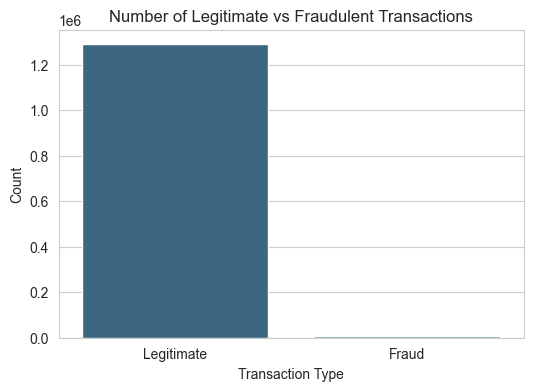

In [5]:
#Check how many fraudulent vs. legitimate transactions
fraud_counts = train_data['is_fraud'].value_counts()

print(fraud_counts)

# Plot the counts
plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='viridis')
plt.title('Number of Legitimate vs Fraudulent Transactions')
plt.xticks([0, 1], ['Legitimate', 'Fraud'])
plt.ylabel('Count')
plt.xlabel('Transaction Type')
plt.show()

**INTERPRETATIONS:**

- We have way more legitimate transactions compared to fraudulent ones.

- Fraud cases are extremely rare.
  This is a highly imbalanced dataset.

**FEATURE SELECTION**

Let's identify important columns that can actually help detect fraud.
Since some columns are useless or not allowed in real life (like first, last, street, zip, etc.),
we will only keep useful columns like: 

| Keep                  | Drop                              |
|------------------------|-----------------------------------|
| trans_date_trans_time  | first, last, street, city, state, zip |
| cc_num                 | (maybe drop later if leakage)     |
| merchant               |                                   |
| category               |                                   |
| amt                    |                                   |
| gender                 |                                   |
| city_pop               |                                   |
| job                    |                                   |
| dob                    |                                   |
| unix_time              |                                   |
| merch_lat              |                                   |
| merch_long             |                                   |


In [6]:
#Drop useless columns
columns_to_drop = ['first', 'last', 'street', 'city', 'state', 'zip']
train_data.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)

train_data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

**FEATURE ENGINEERING**

Now, will create new features that can help the machine learning model:

| New Feature                  | How we create it                               | Why?                                  |
|-------------------------------|------------------------------------------------|---------------------------------------|
| hour                          | Extract hour from `trans_date_trans_time`      | Fraud may happen more at night        |
| age                           | Current year (2019) - year of birth (`dob`)    | Age might impact fraud risk           |
| transaction_day               | Extract day from `trans_date_trans_time`       | To check if fraud occurs more on some days |
| transaction_month             | Extract month from `trans_date_trans_time`     | Seasonal fraud patterns               |


In [7]:
#Feature Engineering

# Convert 'trans_date_trans_time' and 'dob' to datetime
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data['dob'] = pd.to_datetime(train_data['dob'])

test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])
test_data['dob'] = pd.to_datetime(test_data['dob'])

# Create 'hour' feature
train_data['hour'] = train_data['trans_date_trans_time'].dt.hour
test_data['hour'] = test_data['trans_date_trans_time'].dt.hour

# Create 'age' feature
train_data['age'] = 2019 - train_data['dob'].dt.year
test_data['age'] = 2019 - test_data['dob'].dt.year

# Create 'transaction_day' feature
train_data['transaction_day'] = train_data['trans_date_trans_time'].dt.day
test_data['transaction_day'] = test_data['trans_date_trans_time'].dt.day

# Create 'transaction_month' feature
train_data['transaction_month'] = train_data['trans_date_trans_time'].dt.month
test_data['transaction_month'] = test_data['trans_date_trans_time'].dt.month

train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,age,transaction_day,transaction_month
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,31,1,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,41,1,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,57,1,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,52,1,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,33,1,1


**SPLITING THE DATA**

- X → input features

- y → target (is_fraud)

In [8]:
# Separate features and target
X = train_data.drop(['is_fraud', 'trans_date_trans_time', 'dob', 'trans_num', 'cc_num'], axis=1)
y = train_data['is_fraud']

**Train-test split**

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**FIRST MODEL - LOGISTIC REGRESSION MODEL**

In [10]:
# Label encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_cols = ['merchant', 'category', 'gender', 'job']

for col in categorical_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_val[col] = le.transform(X_val[col])

# Train logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_val)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257834
           1       0.00      0.00      0.00      1501

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335

[[257834      0]
 [  1501      0]]


C:\Users\Swamini\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Swamini\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Swamini\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [11]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
# 1. Import required libraries
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 2. Apply SMOTE
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Before SMOTE:', y_train.value_counts())
print('After SMOTE:', y_train_smote.value_counts())

# 3. Train the model on balanced data
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_smote, y_train_smote)

# 4. Predict on validation set
y_pred = model.predict(X_val)

# 5. Evaluate
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))


Before SMOTE: is_fraud
0    1031335
1       6005
Name: count, dtype: int64
After SMOTE: is_fraud
0    1031335
1    1031335
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    257834
           1       0.09      0.76      0.15      1501

    accuracy                           0.95    259335
   macro avg       0.54      0.86      0.56    259335
weighted avg       0.99      0.95      0.97    259335

[[245543  12291]
 [   358   1143]]


**Random Forest Classifier:**

In [13]:
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train on SMOTE data
rf_model.fit(X_train_smote, y_train_smote)

# Predict on validation set
y_pred_rf = rf_model.predict(X_val)

# Evaluate
print(classification_report(y_val, y_pred_rf))
print(confusion_matrix(y_val, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.63      0.82      0.72      1501

    accuracy                           1.00    259335
   macro avg       0.82      0.91      0.86    259335
weighted avg       1.00      1.00      1.00    259335

[[257116    718]
 [   263   1238]]


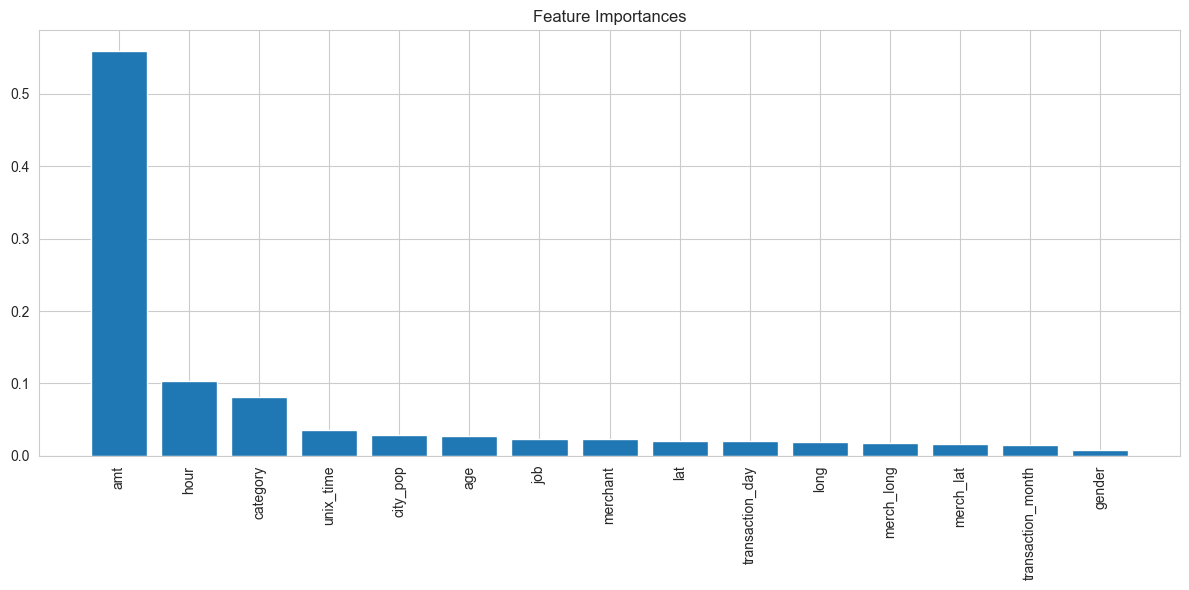

In [14]:
# Plot Feature Importances
importances = rf_model.feature_importances_
features = X_train.columns

# Sort importances
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

**INTERPRETATION**

- Fraud detection heavily depends on the amount, maybe frauds are mostly large or unusual transactions.

- Time of transaction (hour) matters, maybe frauds occur at odd hours.

- Category of spending and city population also play roles, fraud patterns might differ across      locations and spending types.

**Threshold Tuning:**

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

# Get prediction probabilities
y_probs = rf_model.predict_proba(X_val)[:, 1]  # Probabilities for class 1 (fraud)

# Set a custom threshold
threshold = 0.4  #changing 0.5 to 0.4

# Predict fraud if probability > threshold
y_pred_custom = (y_probs > threshold).astype(int)

# Evaluate the model
print(classification_report(y_val, y_pred_custom))
print(confusion_matrix(y_val, y_pred_custom))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.51      0.86      0.64      1501

    accuracy                           0.99    259335
   macro avg       0.75      0.93      0.82    259335
weighted avg       1.00      0.99      1.00    259335

[[256582   1252]
 [   205   1296]]


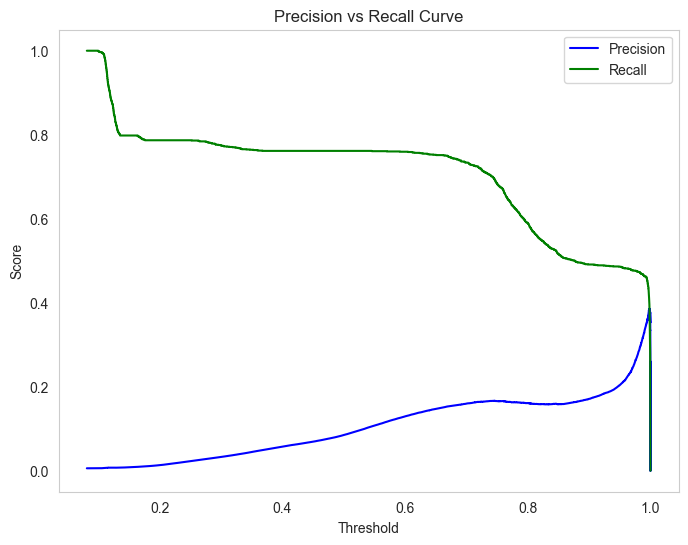

Average Precision Score: 0.1910240670138566


In [16]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Get predicted probabilities
y_scores = model.predict_proba(X_val)[:, 1]  # Probability for class 1 (fraud)

# Calculate precision, recall and thresholds
precision, recall, thresholds = precision_recall_curve(y_val, y_scores)

# Plot the Precision-Recall curve
plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], label="Precision", color='b')
plt.plot(thresholds, recall[:-1], label="Recall", color='g')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision vs Recall Curve')
plt.legend()
plt.grid()
plt.show()

print("Average Precision Score:", average_precision_score(y_val, y_scores))


In [17]:
from sklearn.metrics import f1_score
import numpy as np

# Best threshold selection
best_f1 = 0
best_threshold = 0

for threshold in np.arange(0.0, 1.0, 0.01):
    y_pred_threshold = (y_scores >= threshold).astype(int)
    f1 = f1_score(y_val, y_pred_threshold)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Best F1 Score: {best_f1}")

Best Threshold: 0.99
Best F1 Score: 0.38546866333887964


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict probabilities
y_scores = rf_model.predict_proba(X_val)[:, 1]

# Apply best threshold (0.99 as found earlier)
y_pred_best = (y_scores >= 0.99).astype(int)

# Evaluate
print(classification_report(y_val, y_pred_best))
print(confusion_matrix(y_val, y_pred_best))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       1.00      0.24      0.38      1501

    accuracy                           1.00    259335
   macro avg       1.00      0.62      0.69    259335
weighted avg       1.00      1.00      0.99    259335

[[257834      0]
 [  1145    356]]


In [22]:
# Apply best threshold
y_pred_best = (y_scores >= 0.99).astype(int)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_val, y_pred_best))
print(confusion_matrix(y_val, y_pred_best))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       1.00      0.24      0.38      1501

    accuracy                           1.00    259335
   macro avg       1.00      0.62      0.69    259335
weighted avg       1.00      1.00      0.99    259335

[[257834      0]
 [  1145    356]]


In [23]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict again
y_pred = rf_model.predict(X_val)

# Confusion matrix and classification report
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))


[[257116    718]
 [   263   1238]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.63      0.82      0.72      1501

    accuracy                           1.00    259335
   macro avg       0.82      0.91      0.86    259335
weighted avg       1.00      1.00      1.00    259335



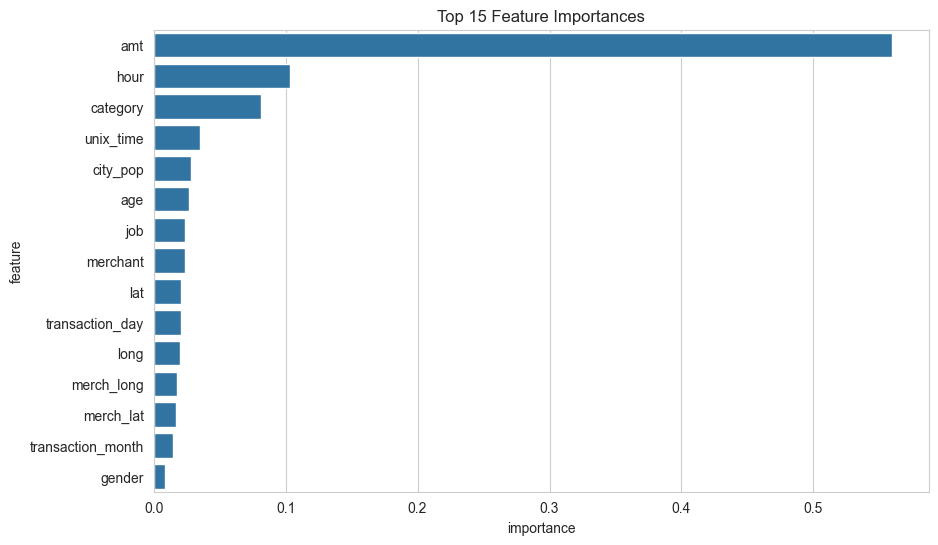

In [25]:
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15))
plt.title('Top 15 Feature Importances')
plt.show()


**Interpretation:**

- Recall (82%): We are catching more fraud cases.
- Precision (63%): A decent portion of predicted frauds are correct.
- F1-score (72%): Much better than your earlier scores

In [29]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_rf = CalibratedClassifierCV(estimator=rf_model, method='sigmoid', cv=3)
calibrated_rf.fit(X_train, y_train)

CalibratedClassifierCV(cv=3,
                       estimator=RandomForestClassifier(n_jobs=-1,
                                                        random_state=42))

In [34]:
X_test = test_data.drop('is_fraud', axis=1)
y_test = test_data['is_fraud']

In [54]:
import pandas as pd
test_data = pd.read_csv('../data/fraudTest.csv')

# Drop columns not used in training
drop_columns = [
    'Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'city', 'state',
    'zip', 'trans_num'
]
test_data = test_data.drop(columns=drop_columns)

# Convert 'dob' to 'age'
test_data['dob'] = pd.to_datetime(test_data['dob'], errors='coerce')
test_data['age'] = 2025 - test_data['dob'].dt.year
test_data = test_data.drop(columns=['dob'])

# Convert 'trans_date_trans_time' to datetime features
test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])
test_data['hour'] = test_data['trans_date_trans_time'].dt.hour
test_data['transaction_day'] = test_data['trans_date_trans_time'].dt.day
test_data['transaction_month'] = test_data['trans_date_trans_time'].dt.month
test_data = test_data.drop(columns=['trans_date_trans_time'])

# Encode categorical variables
test_data['merchant'] = test_data['merchant'].astype('category').cat.codes
test_data['category'] = test_data['category'].astype('category').cat.codes
test_data['job'] = test_data['job'].astype('category').cat.codes
test_data['gender'] = test_data['gender'].map({'F': 0, 'M': 1})

# Define X_test and y_test
X_test = test_data.drop(columns=['is_fraud'])
y_test = test_data['is_fraud']

# Reorder columns to match training set
X_test = X_test[rf_model.feature_names_in_]

# Predict
y_test_pred = rf_model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


[[551593   1981]
 [   841   1304]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.40      0.61      0.48      2145

    accuracy                           0.99    555719
   macro avg       0.70      0.80      0.74    555719
weighted avg       1.00      0.99      1.00    555719



**SAVE THE MODEL**

In [57]:
import joblib

# Save the model
joblib.dump(rf_model, 'random_forest_fraud_model.pkl')

['random_forest_fraud_model.pkl']

**LOAD THE MODEL**

In [58]:
import joblib
# Load the model
rf_model = joblib.load('random_forest_fraud_model.pkl')

# Now you can use it for prediction
y_pred = rf_model.predict(X_test) 